## PCA (Principal Component Analysis)
Practical Implementation

In [3]:
import numpy as np
A = np.array([
        [3,7],
        [-4,-6],
        [7,8],
        [1,-1],
        [-4,-1],
        [-3,-7]
    ])

### Steps for PCA
1. Standardise the data
2. Find the Covariance Matrix
3. Eigen Value and Eigen Vector
4. Find the Principal Component

In [4]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

We will apply dimentionality reduction on this data

In [5]:
A.shape

(6, 2)

Check the dataset is available in standard normal distribution or not 

In [6]:
import pandas as pd

In [9]:
df = pd.DataFrame(A,columns = ['a0','a1'])

In [10]:
df

,a0,a1
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [11]:
df['a0'].mean()

0.0

In [12]:
df['a1'].mean()

0.0

In [18]:
a0 = A[:,0]
a0

array([ 3, -4,  7,  1, -4, -3])

In [21]:
a1 = A[:,1]
a1

array([ 7, -6,  8, -1, -1, -7])

In [22]:
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

Here in the above covariance <br>
cov(a0,a0) = 20 <br>
cov(a0,a1) = 25 <br>
cov(a1,a0) = 25 <br>
cov(a1,a1) = 40 <br>

In [24]:
# Another way to find covariance 
np.sum(a0*a1)/5

25.0

### Find covariance  using matrix multiplication

In [25]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [28]:
# Transpose array 
A.T

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [30]:
A.T @ A/5

array([[20., 25.],
       [25., 40.]])

In [31]:
sigma = A.T @ A/5

### Now find out what is the value of eigen vector or eigen vector of this relation

In [32]:
# eig = eigen
np.linalg.eig(sigma)

(array([ 3.07417596, 56.92582404]),
 array([[-0.82806723, -0.56062881],
        [ 0.56062881, -0.82806723]]))

In [33]:
l,x = np.linalg.eig(sigma)

In [34]:
# Eigen Values
l

array([ 3.07417596, 56.92582404])

In [36]:
# Eigen Vector
x

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [37]:
sigma@x[:,0]

array([-2.54562438,  1.72347161])

In [38]:
sigma@x[:,1]

array([-31.91425695, -47.13840945])

In [39]:
x 

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [40]:
print("First Principal Component")
x[:,1]

First Principal Component


array([-0.56062881, -0.82806723])

In [41]:
print("Second Principal Component")
x[:,0]

Second Principal Component


array([-0.82806723,  0.56062881])

In [42]:
A

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [44]:
# Multiply Dataset with principal component 1
pc1_arr = A @ x[:,1]
pc1_arr

array([ -7.47835704,   7.21091862, -10.54893951,   0.26743842,
         3.07058247,   7.47835704])

In [46]:
# Multiply Dataset with principal component 2
pc2_arr = A @ x[:,0]
pc2_arr

array([ 1.44019997, -0.05150393, -1.31144014, -1.38869604,  2.75164011,
       -1.44019997])

In [50]:
glass_data = (r"https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [51]:
df1 = pd.read_csv(glass_data)
df1

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [57]:
df1.rename(columns= {'Id number': 'index','Type of glass':'class'},inplace = True)

In [58]:
df1

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [61]:
df1 = df1.drop(labels = ['index','class'],axis = 1)

In [62]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


### We have to check :
1. Mean of the dataframe = 0
2. Standard deviation = 1

In [64]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Here 
1. Mean of the dataframe != 0
2. Standard deviation != 1
- PCA works only when the data is standard normally distributed <br>
- This data is not standard normally distributed so we have to use `StandardScaler` to make the data normally distributed

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [74]:
df1_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [70]:
df1 = pd.DataFrame(df1_scaled)

In [71]:
df1.describe()

,0,1,2,3,4,5,6,7,8
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


Now our mean is zero (Because e^-14 means 0.0000000014) <br>
and Standard Deviation is close to one 

### PCA Step1 is done : Data is Standardised

Now as per the theory, once the data is standardised 
- We draw the line( best fit line ) or we can say we find the relation between data using `covariance`
- Then we rotate it to x axis (with `eigen value` and `eigen vector`)
- Then we find out `principle components` 

### Find the covariance

In [83]:
sigma = np.cov(df1)
sigma
## This is covariance matrixes (n*n)

array([[ 0.61967223,  0.1554839 ,  0.0095123 , ..., -0.36961439,
        -0.55499756, -0.52499357],
       [ 0.1554839 ,  0.23446913,  0.20927571, ..., -0.10528676,
        -0.06703188, -0.11242412],
       [ 0.0095123 ,  0.20927571,  0.26700812, ..., -0.07709654,
         0.03531121, -0.01133884],
       ...,
       [-0.36961439, -0.10528676, -0.07709654, ...,  2.02504465,
         1.91941657,  1.96842824],
       [-0.55499756, -0.06703188,  0.03531121, ...,  1.91941657,
         2.03457864,  2.03557203],
       [-0.52499357, -0.11242412, -0.01133884, ...,  1.96842824,
         2.03557203,  2.07393387]])

### Now we wil find the eigen value and eigen vector

In [84]:
l ,x = np.linalg.eig(df1.T @ df1/213)

In [92]:
l # eigen value

array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
       9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
       1.61637096e-03])

- no. of eigen value is equal to no. of columns because for every columns we find out the eigen values
- here we are getting eigen value in real and imaginary numbers 

#### Q. From the above 9 eigen values which will become the PC1?
Ans: 1st value (2.52295323e+00) will become PC1, because its value is max compare to other features

In [81]:
x # eigen vector
# here we are getting eigen vector in real and imaginary numbers # 

array([[-4.90209703e-02+0.j,  1.90749481e-02+0.j, -1.30131230e-02+0.j,
        ..., -3.15640448e-03+0.j, -2.48197530e-03+0.j,
        -1.77861157e-16+0.j],
       [ 2.54779283e-02+0.j,  3.02791993e-02+0.j, -3.04687772e-02+0.j,
        ..., -1.24603522e-02+0.j,  1.72952592e-03+0.j,
         1.68021343e-17+0.j],
       [ 4.14305893e-02+0.j,  3.74402800e-02+0.j, -3.21633520e-02+0.j,
        ...,  6.69398765e-03+0.j,  3.65834962e-03+0.j,
        -2.16665643e-16+0.j],
       ...,
       [ 7.00531319e-02+0.j, -1.55988054e-01+0.j, -4.51735795e-02+0.j,
        ..., -3.17715012e-03+0.j,  2.08055461e-02+0.j,
        -8.20409344e-16+0.j],
       [ 1.00380258e-01+0.j, -1.36080982e-01+0.j, -6.35360864e-02+0.j,
        ...,  2.05618926e-02+0.j,  1.87167574e-02+0.j,
         1.52585820e-16+0.j],
       [ 9.55143934e-02+0.j, -1.47003990e-01+0.j, -4.15557653e-02+0.j,
        ..., -3.90945744e-02+0.j, -4.19667271e-02+0.j,
        -1.36667544e-15+0.j]])

In [105]:
pc1_data = df1_scaled @ x[:,0]
print(pc1_data.shape)
pc1_data


(214,)


array([-1.15113957e+00,  5.74137172e-01,  9.40159722e-01,  1.42083283e-01,
        3.51092291e-01,  2.90266583e-01,  2.52671444e-01,  1.20299466e-01,
        2.08160308e-02,  2.35222894e-03,  3.82514937e-01,  1.33538675e-02,
        3.09724390e-01, -1.56521013e-01,  8.99566628e-02,  1.15255023e-01,
       -1.73458320e-01, -1.45812372e+00, -5.47316267e-01,  3.08817022e-01,
       -2.05673879e-01, -1.21605345e+00, -4.11679297e-02,  1.13206012e-01,
        1.47523366e-01,  5.04865218e-02,  1.55773980e-01,  2.17093779e-01,
        1.15093633e-01,  6.58374915e-02, -2.98261451e-01,  2.22363433e-02,
       -3.96586112e-01,  6.90862734e-02, -8.17537725e-02,  3.88918640e-01,
       -2.57422809e-01, -2.70430953e-02, -1.93311245e+00, -1.93311245e+00,
       -2.13978802e-01, -1.73653764e-02,  9.91042449e-02, -1.90784649e+00,
       -7.55238909e-01, -4.15149070e-01, -6.04423395e-01, -2.97136159e+00,
       -2.07281161e+00, -3.93111591e-01, -2.72721095e+00, -7.23068883e-01,
       -1.06160451e-01, -

In [106]:
pc2_data = df1_scaled @ x[:,1]
print(pc2_data.shape)
pc2_data

(214,)


array([-0.52948764, -0.75978777, -0.92983597, -0.96167744, -1.09124921,
       -1.32400756, -1.11614958, -1.22184622, -0.32193261, -1.06581344,
       -1.38013403, -1.10471913, -1.42304024, -1.23592823, -1.18125211,
       -1.16028212, -1.18243967,  0.09884138, -0.29566013, -0.76316216,
       -0.99918266, -0.43689611, -1.02788338, -1.02762181, -0.93376705,
       -1.04723075, -0.73814955, -1.03946718, -1.05293936, -0.90287584,
       -1.16489328, -1.16273745, -1.07307343, -1.16390421, -0.96601943,
       -1.00978004, -0.09893604, -0.94115087, -0.1421143 , -0.1421143 ,
       -1.06505169, -1.10093167, -0.74680692, -0.13514622, -1.19430193,
       -0.29328726, -0.78019985,  0.4631405 , -0.19367388, -0.34025819,
       -0.11303858, -0.47489193, -0.41450604, -0.4099579 , -0.51028779,
       -0.97207179, -1.81655603, -0.95745406, -1.10236197, -1.05432062,
       -0.5519114 ,  0.5683302 , -0.2964757 ,  0.18518682, -0.23485117,
       -0.0168166 , -0.42701387, -0.44708532, -0.36349866,  0.02

In [108]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [110]:
pca.fit_transform(df1)
# These values are same as pc1_data

array([[ 1.15113957e+00, -5.29487638e-01],
       [-5.74137172e-01, -7.59787774e-01],
       [-9.40159722e-01, -9.29835966e-01],
       [-1.42083283e-01, -9.61677440e-01],
       [-3.51092291e-01, -1.09124921e+00],
       [-2.90266583e-01, -1.32400756e+00],
       [-2.52671444e-01, -1.11614958e+00],
       [-1.20299466e-01, -1.22184622e+00],
       [-2.08160308e-02, -3.21932609e-01],
       [-2.35222894e-03, -1.06581344e+00],
       [-3.82514937e-01, -1.38013403e+00],
       [-1.33538675e-02, -1.10471913e+00],
       [-3.09724390e-01, -1.42304024e+00],
       [ 1.56521013e-01, -1.23592823e+00],
       [-8.99566628e-02, -1.18125211e+00],
       [-1.15255023e-01, -1.16028212e+00],
       [ 1.73458320e-01, -1.18243967e+00],
       [ 1.45812372e+00,  9.88413780e-02],
       [ 5.47316267e-01, -2.95660130e-01],
       [-3.08817022e-01, -7.63162157e-01],
       [ 2.05673879e-01, -9.99182661e-01],
       [ 1.21605345e+00, -4.36896108e-01],
       [ 4.11679297e-02, -1.02788338e+00],
       [-1.

### Explained Variance Ration

In [111]:
df1

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


- Now in df1 we have 9 columns, so 9 pc (principal components) we are able to generate. But how many Pc(pricipal component) will be able to explain the whole data. ?
- How we are able to know about that one ?

In [113]:
pca = PCA()


In [13]:
principal_component = pca.fit_transform(df1)
principal_component

NameError: name 'pca' is not defined

In [118]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

Text(0, 0.5, 'EVR')

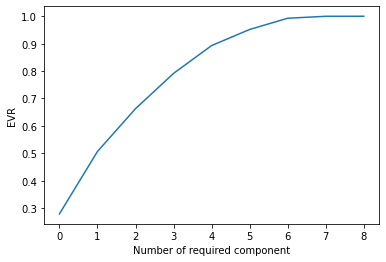

In [122]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot( np.cumsum ( pca.explained_variance_ratio_ ))
plt.xlabel("Number of required component")
plt.ylabel("EVR")

# cumsum : cummulative sum
# cumsum() function returns the cumulative sum of the elements along the given axis

This is called as `screen plot `

- Now looking at the screen plot we can say that 5 or 6 number of components are require to explain our 90% data
- That means we have 9 coloumns out of this if we create 5 pcs than we can say that we have more then 90% meaning of the dataset

## Next Class
Extended PCA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
glass_data = (r"https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")
data = pd.read_csv(glass_data)
data.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.isna().sum()
#  no null value

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [6]:
data = data.drop(['Id number','Type of glass'],axis = 1)

In [7]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
principal_component = pca.fit_transform(data_scaled)
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

Text(0, 0.5, 'EVR')

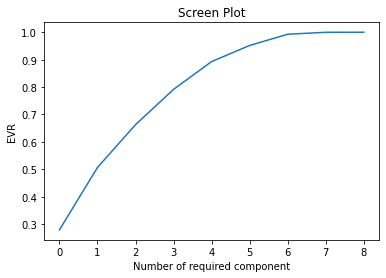

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot( np.cumsum ( pca.explained_variance_ratio_ ))
plt.title("Screen Plot")
plt.xlabel("Number of required component")
plt.ylabel("EVR")

In [38]:
pca1 = PCA(n_components=5)
pca1.fit_transform(data_scaled)
pd.DataFrame(pca1.fit_transform(data_scaled), columns = ['PC1','PC2','PC3','PC4','PC5'])

,PC1,PC2,PC3,PC4,PC5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090
...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227
210,-2.397652,3.108236,-1.117502,0.288454,0.624723
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008


### <div class="alert alert-warning">Instead of using this pca algorithm , we can do manual calculation as </div>

In [ ]:
def pc_calculation(x, no_of_dimen):
    pca = {}
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    l,x = np.linalg.eig(x_scaled.T @ x_scaled)/(x_scaled.shape[0]-1)
    for i in range(no_of_dimen):
        pc = x_scaled @x[:,i]
        pca[i] = pc
    pca_df = pd.DataFrame(pca)
    return pca_df

- returning back to previous line of codes 
### Define X and y variables

In [39]:
X = pd.DataFrame(pca1.fit_transform(data_scaled), columns = ['PC1','PC2','PC3','PC4','PC5'])

In [40]:
data1 = pd.read_csv(glass_data)

In [41]:
y = data1['Type of glass']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of glass, Length: 214, dtype: int64

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [37]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X,y)

DecisionTreeClassifier()

In [53]:
pca1.transform ( scaler.transform ( [[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]] ) )

C:\Users\M G ENGINEERING\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.15113957, -0.52948764, -0.37209565,  1.72890103, -0.25193583]])

- Now suppose we enter 9 feature data into then it we automatically convert it into 5 principal component data
- Now when we predict the model

In [54]:
dt_model.predict ( pca1.transform ( scaler.transform ( [[1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0]] ) ) )

C:\Users\M G ENGINEERING\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\M G ENGINEERING\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

- now it is showing us the class